In [2]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import plotly.graph_objects as go
from scipy import interpolate




In [59]:

file_path = "C:\\Users\\Modern\\Desktop\\Python\\Magnetic_field_processing\\Perpendicular to field 0 mm.dat"
# fields_df = pd.DataFrame({'B':[], 'X':[], 'Y':[]})
field = pd.read_csv(file_path,encoding = 'unicode_escape',delimiter='\t',names= ['B','X','Y'],skiprows=[0])



print(field)



           B   X   Y
0     125.67   0   0
1     171.93   2   0
2     229.89   4   0
3     302.55   6   0
4     393.44   8   0
..       ...  ..  ..
355   447.41  10  70
356   578.30  12  70
357   745.77  14  70
358   989.29  16  70
359  1275.29  18  70

[360 rows x 3 columns]


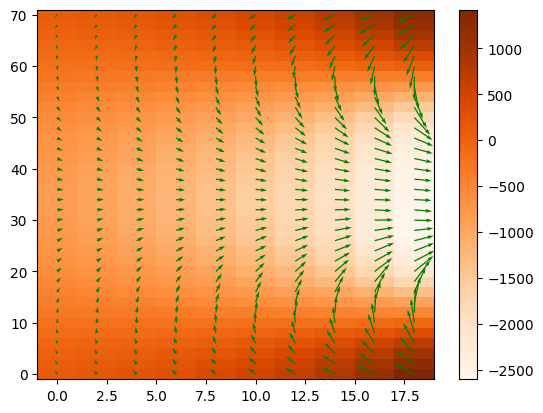

In [60]:
field_flat_np_xy = field.to_numpy()
field_flat_square_xy = np.reshape(field_flat_np_xy[:,0],(36,10))

xs = field['X'].drop_duplicates().to_numpy()
ys = field['Y'].drop_duplicates().to_numpy()

fig, ax = plt.subplots()
plt.pcolormesh(xs, ys, field_flat_square_xy, cmap='Oranges')
plt.colorbar()

dx,dy = np.gradient(field_flat_square_xy)
ax.quiver(xs, ys, dy*-1, dx*-1, color = 'green')

[-109.51  -117.315 -132.6   -151.59  -172.285 -195.32  -221.855 -254.46
 -281.945 -289.51 ]


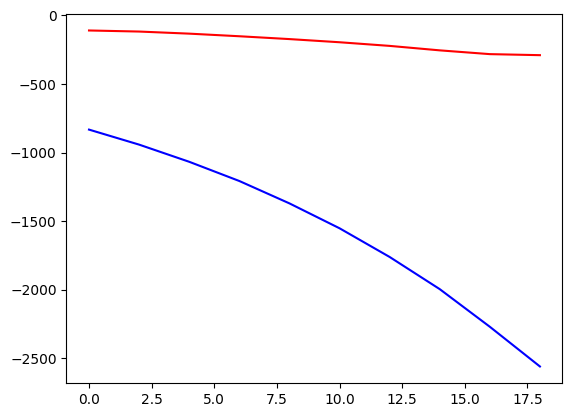

In [61]:
field_line = field[field['Y']==34].copy()

field_line_np = field_line['B'].to_numpy()
db = np.gradient(field_line_np)
print(db)


fig, ax = plt.subplots()
plt.plot(field_line['X'],field_line['B'], color='blue')
plt.plot(field_line['X'],db, color='red')
